# Noise Reduction using Lowpass and Highpass windows

Steps of algorithm:

1) data is loaded

2) an FFT is calculated over the audio clip

3) Gaussian noise is added to data

4) Highpass filter is applied to noisy data

5) Lowpass filter is applied to noisy data

More information here: https://github.com/davidpraise45/Audio-Signal-Processing

In [9]:
import numpy as np
import scipy as sp
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

import IPython
import io

import soundfile as sf

get_ipython().magic('matplotlib inline')

In [10]:
# load data

# data, rate = sf.read('fish.wav')
data, rate = sf.read('eagle.wav')

IPython.display.Audio(data=data, rate=rate)

Text(0, 0.5, 'Amplitude')

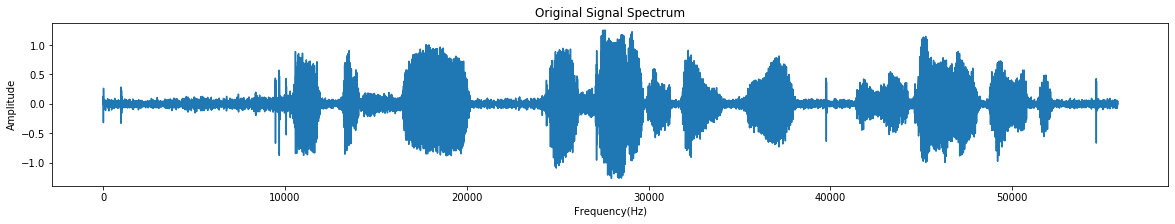

In [11]:
# make frequency plot of initial input signal

fig, ax = plt.subplots(figsize=(20,3))
plt.plot(data) 
plt.title('Original Signal Spectrum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


Text(0, 0.5, 'Amplitude')

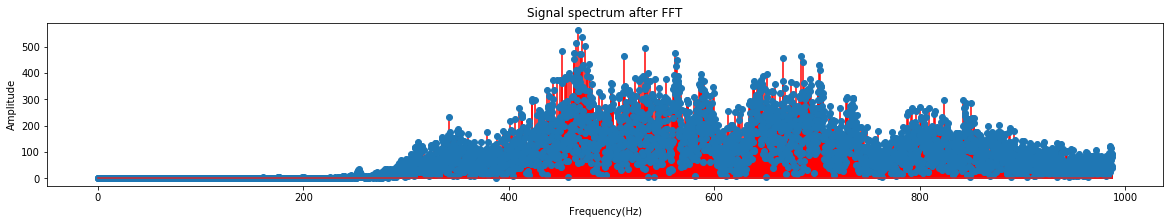

In [12]:
# Calculating the fourier transformation of the signal

FourierTransformation = sp.fft(data) 
scale = sp.linspace(0, rate, len(data))

# make plot after FFT

fig, ax = plt.subplots(figsize=(20,3))
plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), 'r')  # The size of our diagram
plt.title('Signal spectrum after FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [13]:
# adding Guassian noise to the signal

GuassianNoise = np.random.rand(len(FourierTransformation))
NewSound = GuassianNoise + data
b,a = signal.butter(5, 1000/(rate/2), btype='highpass') # ButterWorth filter 4350

Text(0, 0.5, 'Amplitude')

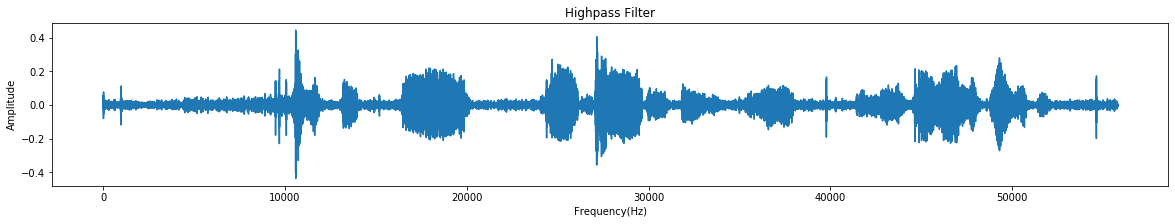

In [14]:
# applying highpass filter

fig, ax = plt.subplots(figsize=(20,3))

filteredSignal = signal.lfilter(b,a,data)
plt.plot(filteredSignal) # plotting the signal.
plt.title('Highpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

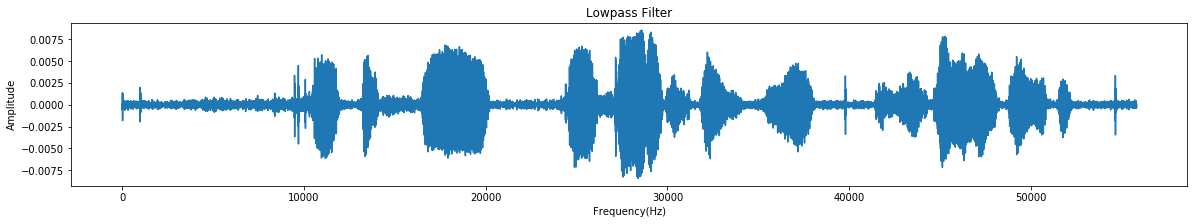

In [15]:
# applying lowpass filter

fig, ax = plt.subplots(figsize=(20,3))

c,d = signal.butter(5, 380/(rate/2), btype='lowpass') # ButterWorth low-filter
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal
plt.plot(newFilteredSignal) # plotting the signal.
plt.title('Lowpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [16]:
IPython.display.Audio(data=newFilteredSignal, rate=rate)